In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 1. Data Preprocessing 
print("--- Step 1: Data Loading and Preprocessing ---")


try:
    df = pd.read_csv('loans.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'loans.csv' not found. Please ensure the file is in the same directory.")
    exit()

# Initial information about the dataset
print("\nDataFrame Info:")
df.info()

--- Step 1: Data Loading and Preprocessing ---
Dataset loaded successfully.

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             16000 non-null  int64  
 1   Income          16000 non-null  int64  
 2   MonthsEmployed  16000 non-null  int64  
 3   DTIRatio        16000 non-null  float64
 4   Education       16000 non-null  object 
 5   EmploymentType  16000 non-null  object 
 6   MaritalStatus   16000 non-null  object 
 7   HasMortgage     16000 non-null  int64  
 8   HasDependents   16000 non-null  int64  
 9   LoanPurpose     16000 non-null  object 
 10  HasCoSigner     16000 non-null  int64  
 11  CreditScore     16000 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.5+ MB


In [4]:
print("\nFirst 5 rows of the DataFrame:")
df.head()


First 5 rows of the DataFrame:


,Age,Income,MonthsEmployed,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,CreditScore
0,56,156584,120,0.439075,Undergraduate,Self-Employed,Single,0,0,Other-Miscellaneous,0,618
1,69,287284,120,0.619749,Postgraduate,Self-Employed,Divorced/Widowed,0,0,Debt Consolidation,0,810
2,46,27602,120,0.387462,Primary,Salaried,Single,0,1,Debt Consolidation,0,543
3,32,180935,120,0.194088,Undergraduate,Self-Employed,Single,1,1,Other-Miscellaneous,0,659
4,60,223913,120,0.547845,Undergraduate,Unemployed,Single,1,1,Home Improvement,0,761


In [ ]:
target_col = 'CreditScore'
features = df.drop(columns=[target_col])
target = df[target_col]

# Categorical and numerical columns
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
numerical_cols = [col for col in features.columns if col not in categorical_cols]

# One-Hot Encoding on categorical features
print("\nApplying One-Hot Encoding to categorical features...")
X_encoded = pd.get_dummies(features, columns=categorical_cols, drop_first=True)

print("\nShape of the new features DataFrame after One-Hot Encoding:")
print(X_encoded.shape)
print("\nFirst 5 rows of the encoded features:")
print(X_encoded.head())


Applying One-Hot Encoding to categorical features...

Shape of the new features DataFrame after One-Hot Encoding:
(16000, 19)

First 5 rows of the encoded features:
   Age  Income  MonthsEmployed  DTIRatio  Education_Primary  \
0   56  156584             120  0.439075              False   
1   69  287284             120  0.619749              False   
2   46   27602             120  0.387462               True   
3   32  180935             120  0.194088              False   
4   60  223913             120  0.547845              False   

   Education_Secondary  Education_Undergraduate  EmploymentType_Salaried  \
0                False                     True                    False   
1                False                    False                    False   
2                False                    False                     True   
3                False                     True                    False   
4                False                     True                    False   

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, target, test_size=0.2, random_state=42)
print("\nData split into training and testing sets.")
print(f"Training set size: {X_train.shape[0]} records")
print(f"Testing set size: {X_test.shape[0]} records")


Data split into training and testing sets.
Training set size: 12800 records
Testing set size: 3200 records


In [ ]:
#2. EDA and Visualization
print("\n\n--- Step 2: Exploratory Data Analysis & Visualization ---")
sns.set_style("whitegrid")
plt.style.use('ggplot')



--- Step 2: Exploratory Data Analysis & Visualization ---


Generating distributions for numerical features...


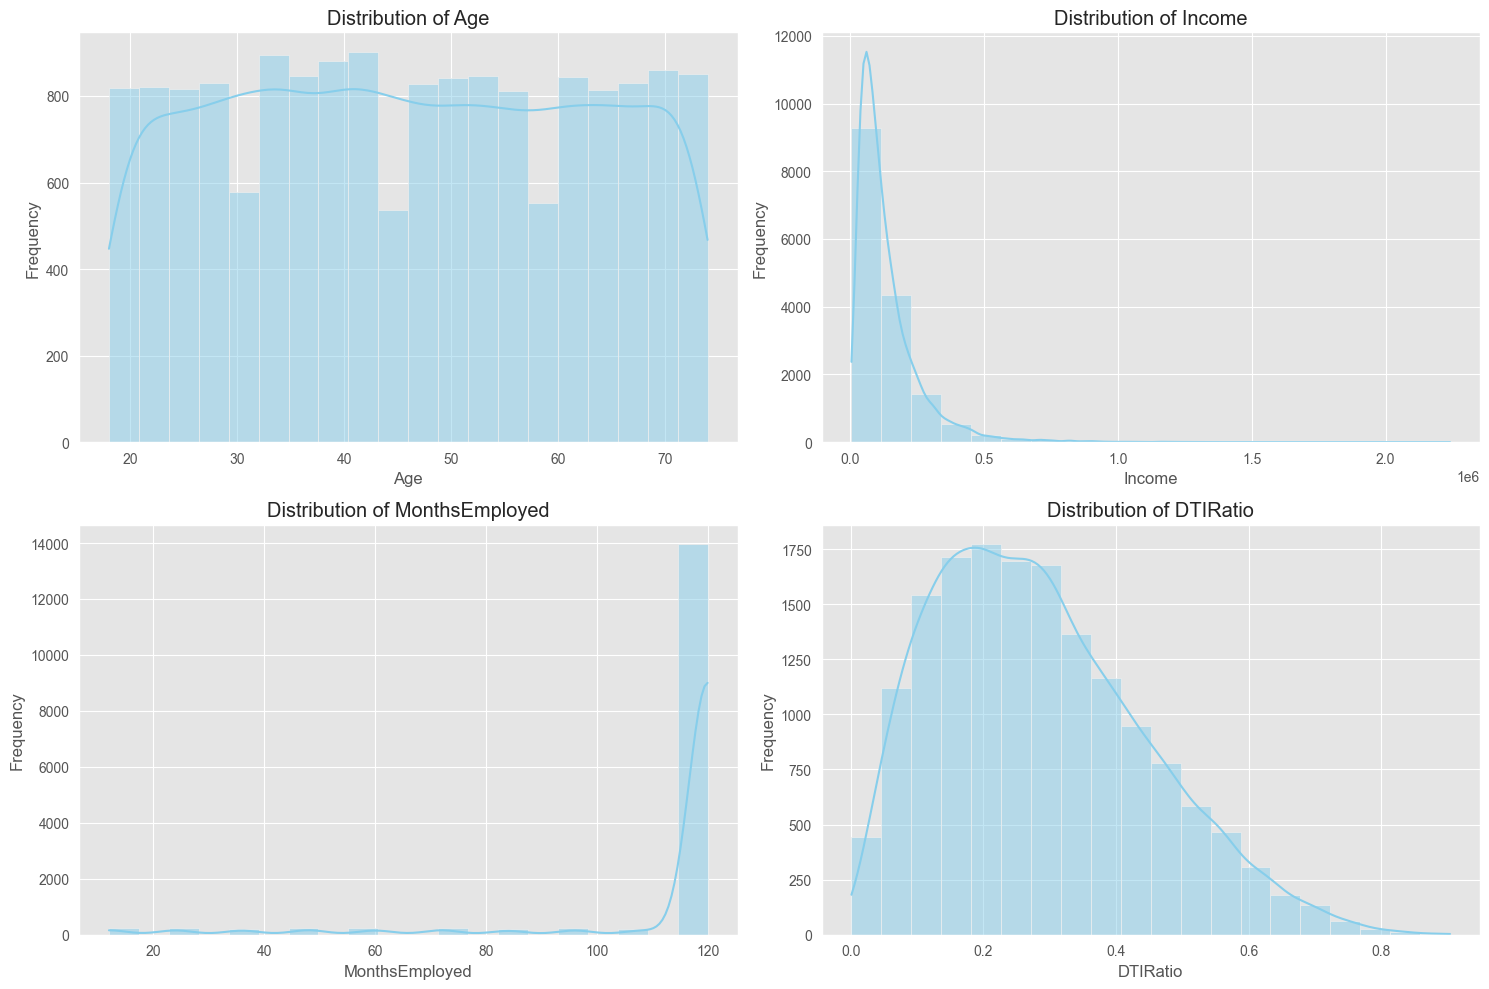

In [ ]:
# Distributions of numerical features
print("Generating distributions for numerical features...")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Generating distributions for categorical features...


C:\Users\Shirlyne\AppData\Local\Temp\ipykernel_4304\4291774797.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
C:\Users\Shirlyne\AppData\Local\Temp\ipykernel_4304\4291774797.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
C:\Users\Shirlyne\AppData\Local\Temp\ipykernel_4304\4291774797.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
C:\Users\Shirlyne\AppData\Local\Temp\ipykernel_4304\4291774797.py:6: FutureWarning: 

Passi

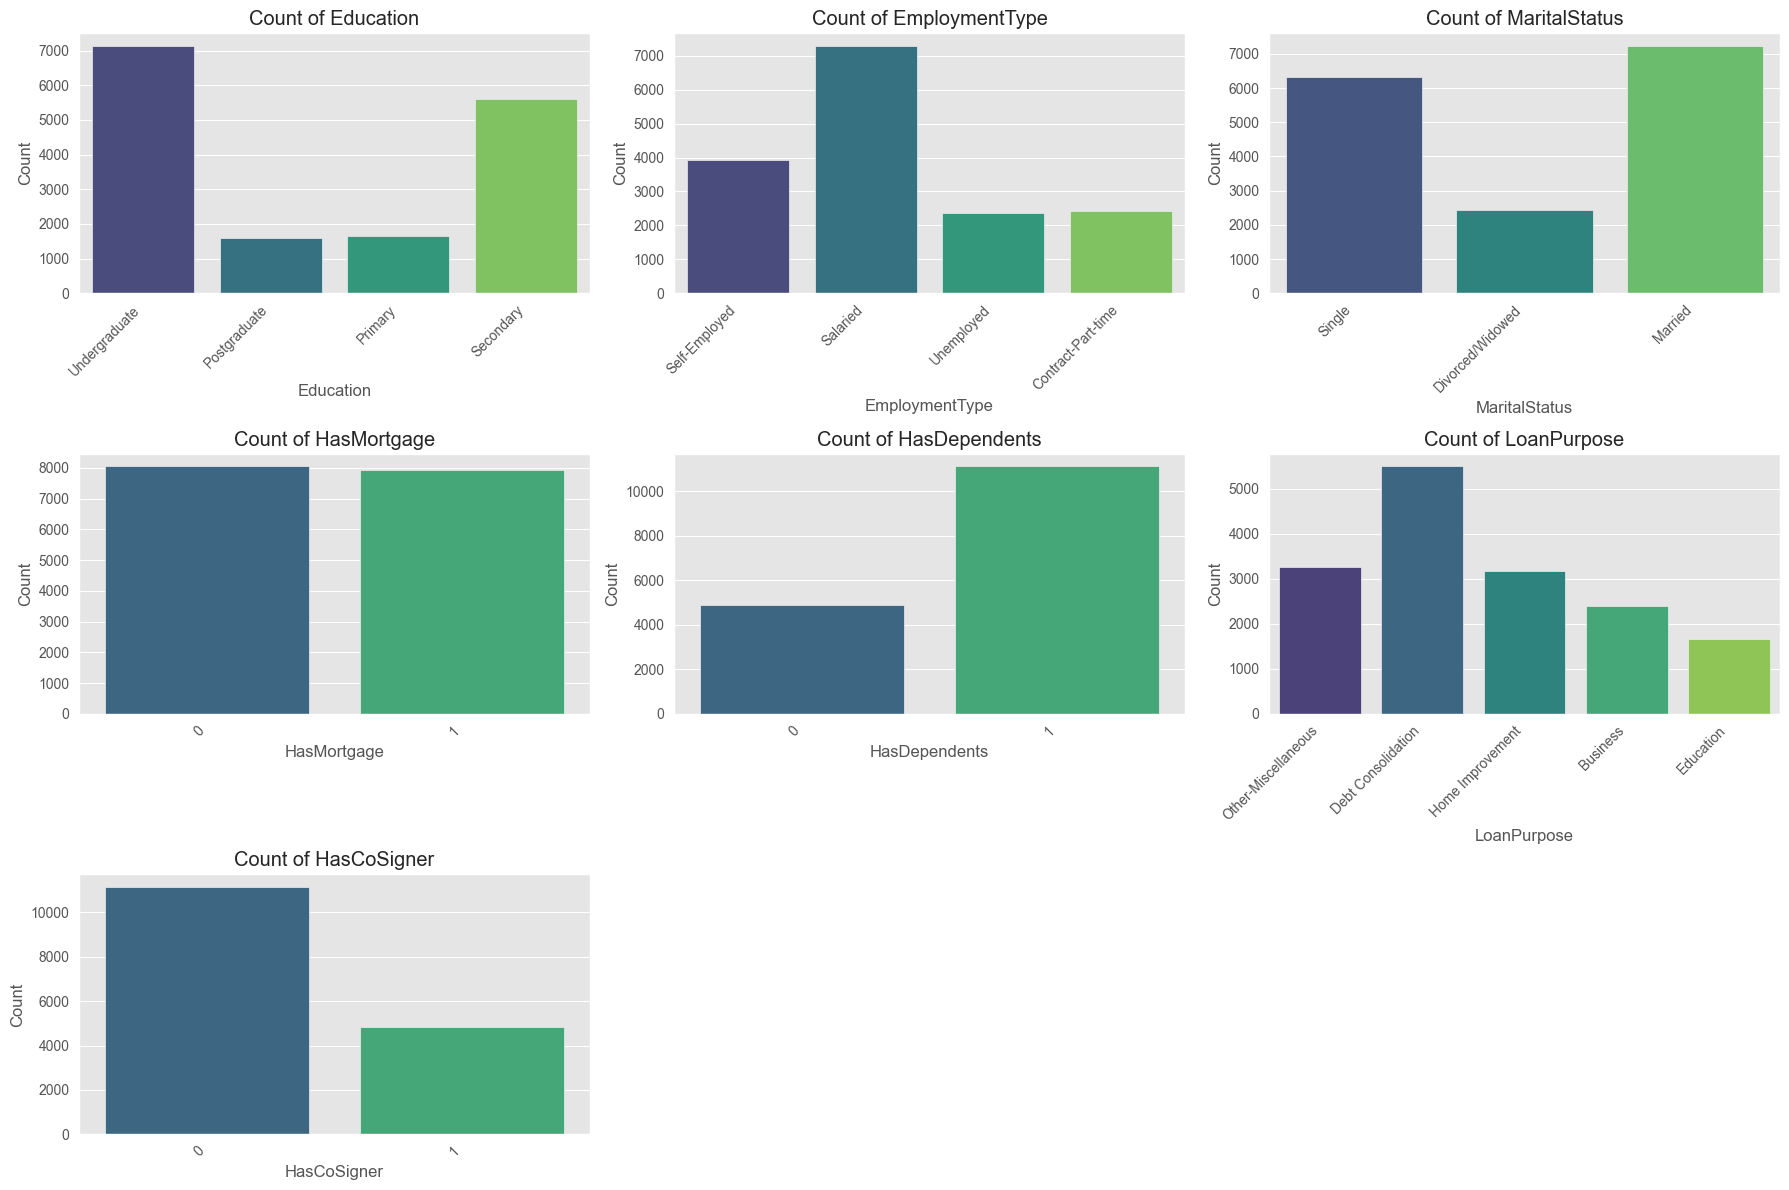

In [ ]:
# distributions of categorical features
print("Generating distributions for categorical features...")
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Generating correlation heatmap for numerical features and the target...


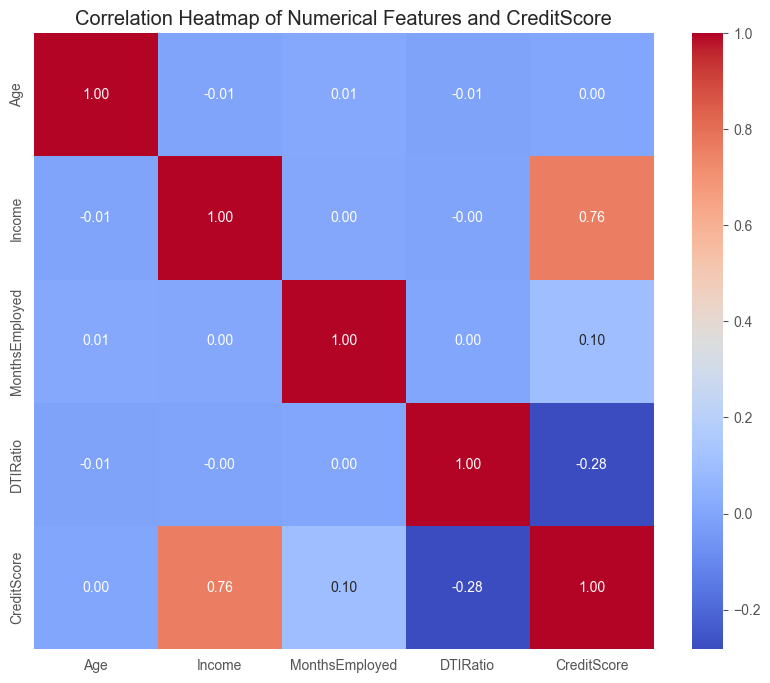

In [ ]:
# Correlation Heatmap for all numerical variables
print("Generating correlation heatmap for numerical features and the target...")
numerical_and_target = df[numerical_cols + [target_col]]
corr_matrix = numerical_and_target.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features and CreditScore')
plt.show()


Generating visualizations of feature relationships with CreditScore...


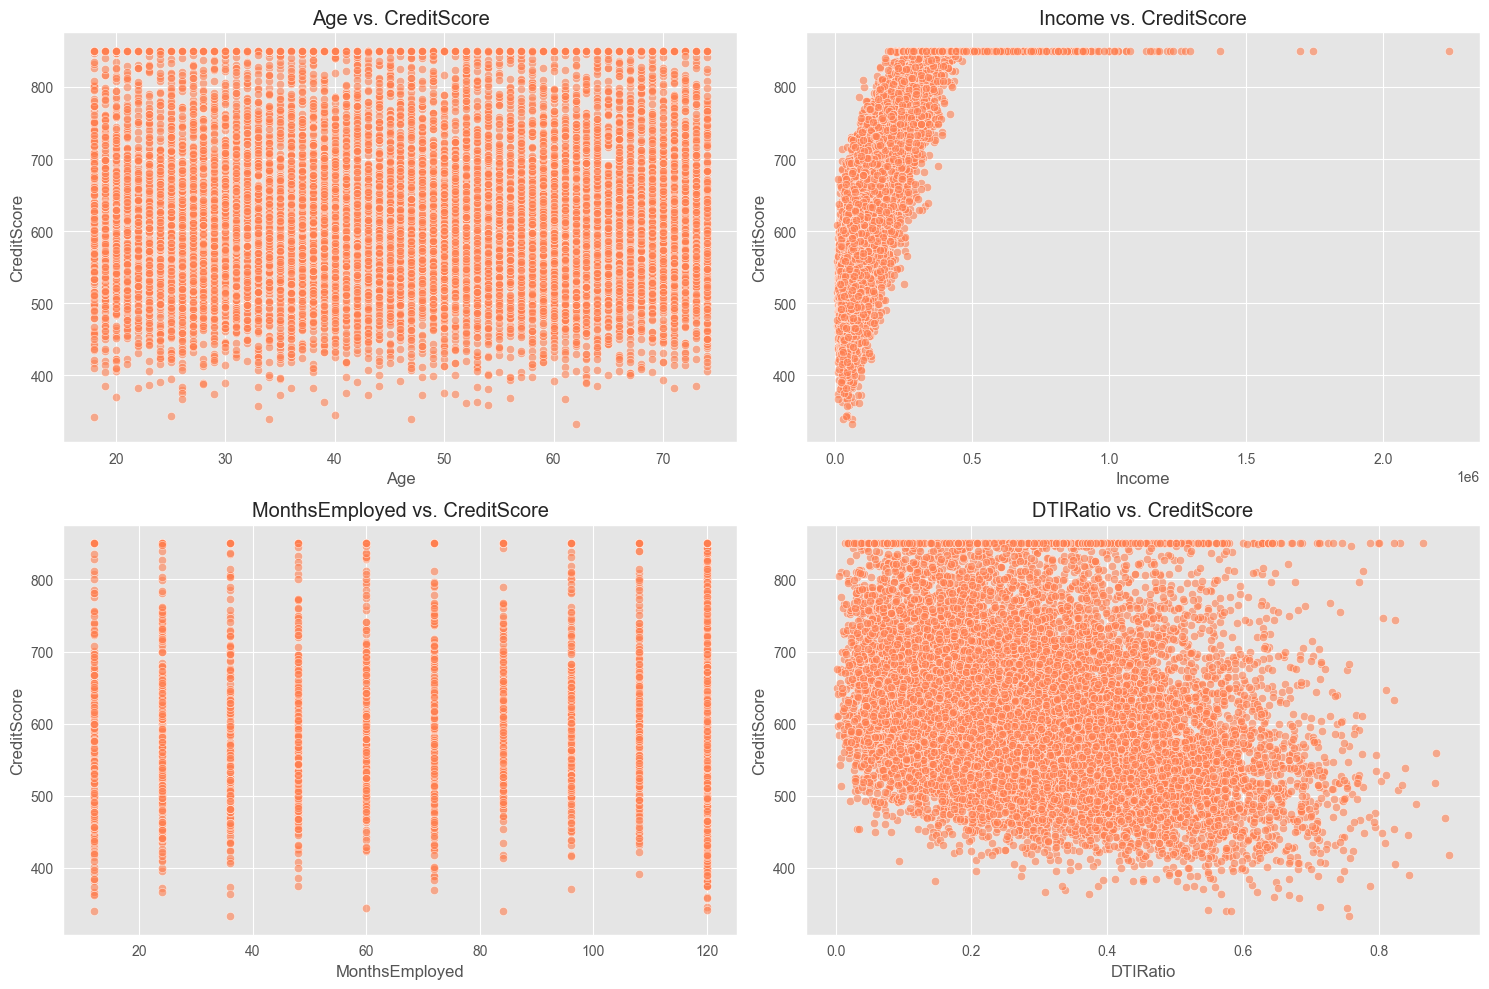

In [ ]:
# Relationships between features and CreditScore
print("Generating visualizations of feature relationships with CreditScore...")


plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df, x=col, y=target_col, alpha=0.6, color='coral')
    plt.title(f'{col} vs. CreditScore')
    plt.xlabel(col)
    plt.ylabel('CreditScore')
plt.tight_layout()
plt.show()

Generating box plots for categorical features vs. CreditScore...


C:\Users\Shirlyne\AppData\Local\Temp\ipykernel_4304\2383231840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target_col, palette='pastel')
C:\Users\Shirlyne\AppData\Local\Temp\ipykernel_4304\2383231840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target_col, palette='pastel')
C:\Users\Shirlyne\AppData\Local\Temp\ipykernel_4304\2383231840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y=target_col, palette='pastel')
C:\Users\Shirlyne\AppData\Local\Temp\ipykernel_4304\238323

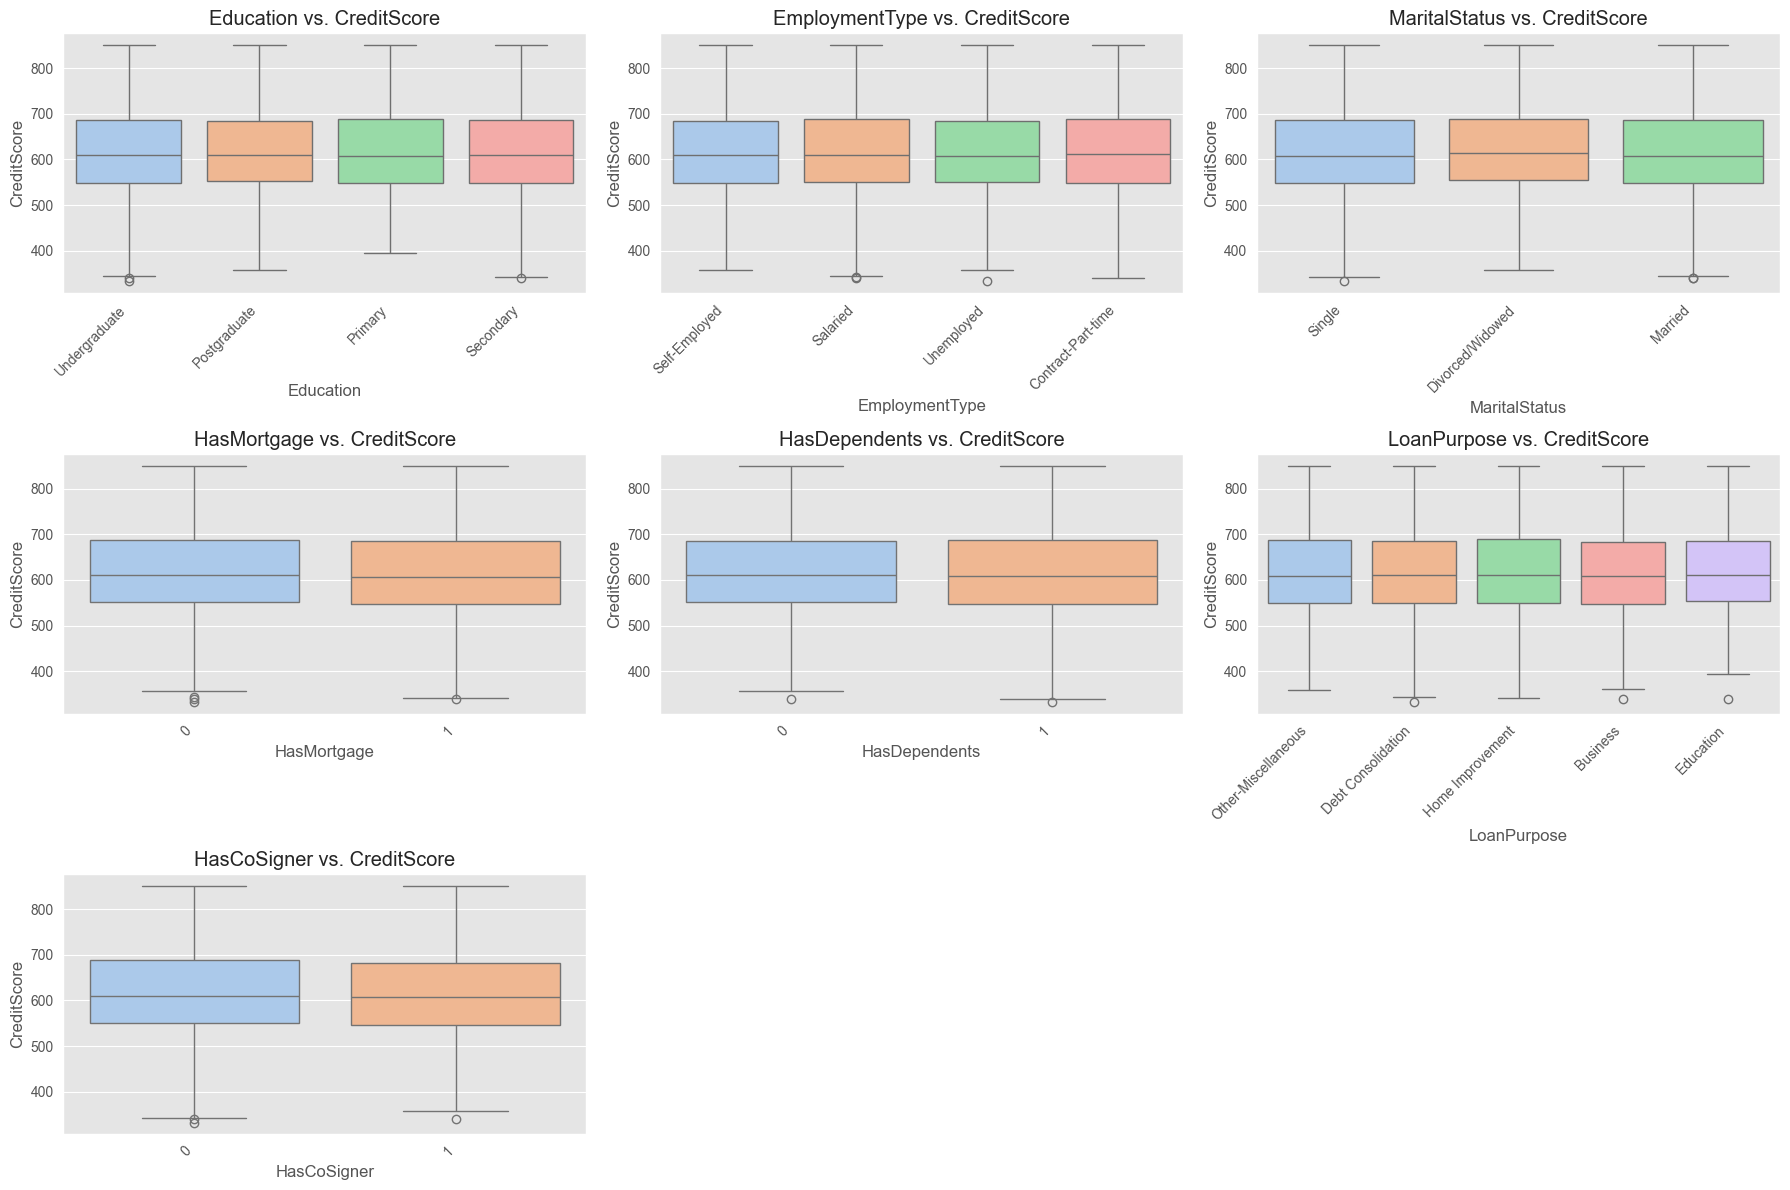

In [ ]:
# Box plots for categorical features vs. CreditScore 
print("Generating box plots for categorical features vs. CreditScore...")
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=col, y=target_col, palette='pastel')
    plt.title(f'{col} vs. CreditScore')
    plt.xlabel(col)
    plt.ylabel('CreditScore')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# --- 3. Model Training and Evaluation ---
print("\n\n--- Step 3: Model Training and Evaluation ---")

#model performance metrics
performance_metrics = []

# Train and evaluating model
def train_and_evaluate(model, model_name):
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    

    performance_metrics.append({
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    })
    # results
    print(f"--- {model_name} Performance ---")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2) Score: {r2:.4f}")
    
   
    return y_pred



--- Step 3: Model Training and Evaluation ---


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}


Training Linear Regression...
--- Linear Regression Performance ---
Mean Squared Error (MSE): 3580.85
Root Mean Squared Error (RMSE): 59.84
R-squared (R2) Score: 0.6854


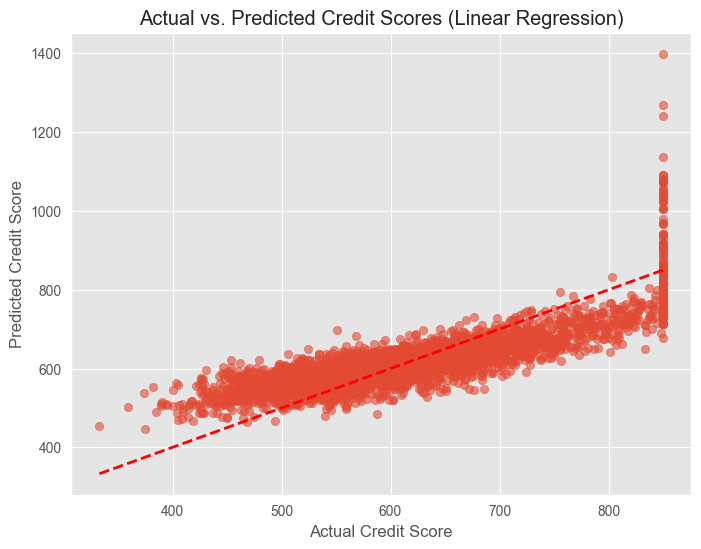


Training Random Forest Regressor...
--- Random Forest Regressor Performance ---
Mean Squared Error (MSE): 2524.22
Root Mean Squared Error (RMSE): 50.24
R-squared (R2) Score: 0.7782


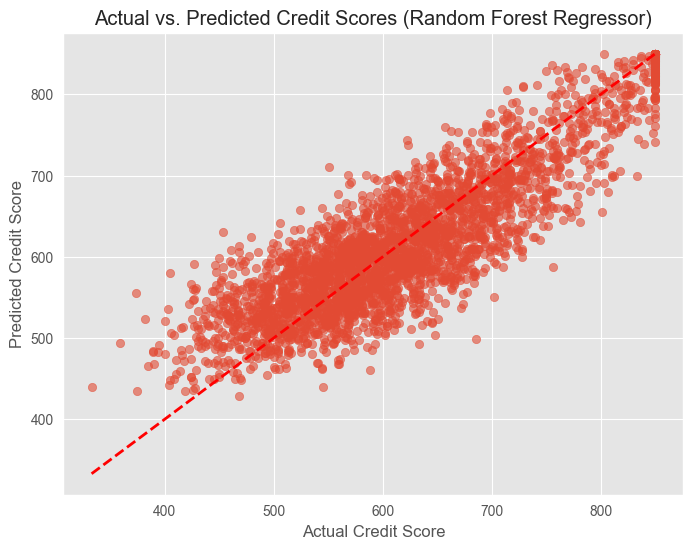


Training Gradient Boosting Regressor...
--- Gradient Boosting Regressor Performance ---
Mean Squared Error (MSE): 2329.45
Root Mean Squared Error (RMSE): 48.26
R-squared (R2) Score: 0.7953


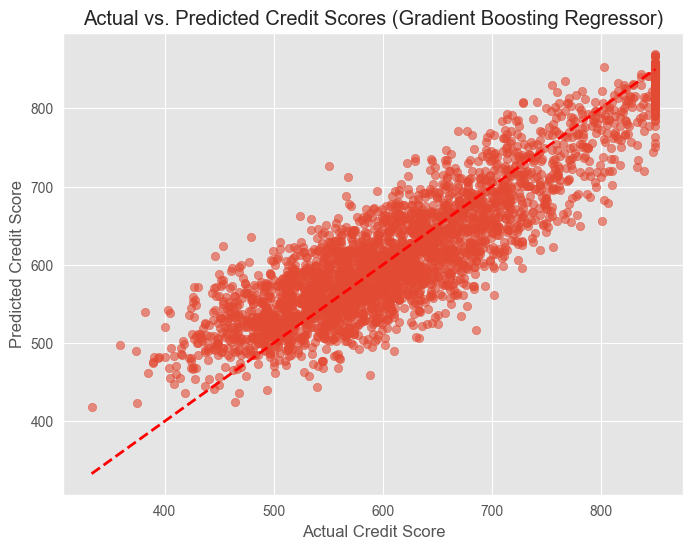

In [ ]:
for name, model in models.items():
    y_pred = train_and_evaluate(model, name)
    # actual vs. predicted for each model
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Credit Score')
    plt.ylabel('Predicted Credit Score')
    plt.title(f'Actual vs. Predicted Credit Scores ({name})')
    plt.show()

In [18]:
df.describe()

,Age,Income,MonthsEmployed,DTIRatio,HasMortgage,HasDependents,HasCoSigner,CreditScore
count,16000.000000,1.600000e+04,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,46.009125,1.349235e+05,112.209000,0.284790,0.496563,0.694500,0.303063,624.290375
std,16.395562,1.242530e+05,23.152015,0.158992,0.500004,0.460633,0.459596,106.387364
min,18.000000,3.853000e+03,12.000000,0.001339,0.000000,0.000000,0.000000,333.000000
25%,32.000000,5.718000e+04,120.000000,0.160281,0.000000,0.000000,0.000000,549.000000
50%,46.000000,9.852950e+04,120.000000,0.264880,0.000000,1.000000,0.000000,609.000000
75%,60.000000,1.685710e+05,120.000000,0.386985,1.000000,1.000000,1.000000,687.000000
max,74.000000,2.240565e+06,120.000000,0.903913,1.000000,1.000000,1.000000,850.000000
